<a href="https://colab.research.google.com/github/UmrSmr/Cats-vs-Dogs-CNN/blob/main/cats_vs_dogs_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"creativeumair","key":"b3c4e2636953d4b83ec369844ef0cabb"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c dogs-vs-cats

 90% 731M/812M [00:06<00:01, 53.3MB/s]
100% 812M/812M [00:06<00:00, 130MB/s] 


In [8]:
!unzip -qq train.zip

In [9]:
import os, shutil, pathlib

In [10]:
original_dir = pathlib.Path("train")

In [15]:
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [33]:
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)

        fnames = [
            f"{category}.{i}.jpg"
            for i in range(start_index, end_index)
        ]

        for fname in fnames:
            shutil.copyfile(
                src=original_dir / fname,
                dst=dir / fname
            )


In [19]:
from tensorflow import keras
from tensorflow.keras import layers


In [20]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [21]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])

In [34]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32,
    shuffle=True
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32,
    shuffle=True
)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32,
    shuffle=False
)


Found 0 files belonging to 1 classes.


ValueError: No images found in directory /content/cats_and_dogs_small/train. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [35]:
import os

print(os.listdir(new_base_dir))
print(os.listdir(new_base_dir / "train"))


['train']
['cat']


In [36]:
print(len(os.listdir(new_base_dir / "train" / "cat")))
print(len(os.listdir(new_base_dir / "train" / "dog")))


0


FileNotFoundError: [Errno 2] No such file or directory: '/content/cats_and_dogs_small/train/dog'

In [37]:
original_dir = Path("/content/dogs-vs-cats/train")
new_base_dir = Path("/content/cats_and_dogs_small")


In [38]:
make_subset("train", 0, 1000)
make_subset("validation", 1000, 1500)
make_subset("test", 1500, 2500)


FileNotFoundError: [Errno 2] No such file or directory: '/content/dogs-vs-cats/train/cat.0.jpg'

In [39]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)


Found 0 files belonging to 1 classes.


ValueError: No images found in directory /content/cats_and_dogs_small/train. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [40]:
import os
import shutil
from pathlib import Path

original_dir = Path("/kaggle/input/dogs-vs-cats/train")   # adjust if needed
new_base_dir = Path("/kaggle/working/cats_and_dogs_small")


In [41]:
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)

        fnames = [
            f"{category}.{i}.jpg"
            for i in range(start_index, end_index)
        ]

        for fname in fnames:
            shutil.copyfile(
                src=original_dir / fname,
                dst=dir / fname
            )


In [42]:
make_subset("train", 0, 1000)
make_subset("validation", 1000, 1500)
make_subset("test", 1500, 2500)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/dogs-vs-cats/train/cat.0.jpg'

In [44]:
import zipfile
from pathlib import Path

zip_path = Path("/content/train.zip")   # where your zip is
extract_path = Path("/content/dogs-vs-cats")

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [46]:
from pathlib import Path

original_dir = Path("/content/dogs-vs-cats/train")
new_base_dir = Path("/content/cats_and_dogs_small")


In [47]:
import os
import shutil

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)

        fnames = [
            f"{category}.{i}.jpg"
            for i in range(start_index, end_index)
        ]

        for fname in fnames:
            shutil.copyfile(
                src=original_dir / fname,
                dst=dir / fname
            )


In [48]:
make_subset("train", 0, 1000)
make_subset("validation", 1000, 1500)
make_subset("test", 1500, 2500)


In [49]:
import os
print(len(os.listdir(new_base_dir / "train" / "cat")))
print(len(os.listdir(new_base_dir / "train" / "dog")))


1000
1000


In [50]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32
)


Found 2000 files belonging to 2 classes.


In [51]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
 new_base_dir / "train",
 image_size=(180, 180),
 batch_size=32)
validation_dataset = image_dataset_from_directory(
 new_base_dir / "validation",
 image_size=(180, 180),
 batch_size=32)
test_dataset = image_dataset_from_directory(
 new_base_dir / "test",
 image_size=(180, 180),
 batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [52]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [54]:
from tensorflow import keras
from tensorflow.keras import layers

normalization_layer = layers.Rescaling(1./255)


In [55]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [56]:
model = keras.Sequential([
    data_augmentation,
    normalization_layer,

    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [57]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [58]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.5004 - loss: 0.9038 - val_accuracy: 0.5000 - val_loss: 0.7026
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5120 - loss: 0.6933 - val_accuracy: 0.5190 - val_loss: 0.7004
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5510 - loss: 0.6846 - val_accuracy: 0.5900 - val_loss: 0.6645
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.6395 - loss: 0.6616 - val_accuracy: 0.6290 - val_loss: 0.6552
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.6362 - loss: 0.6546 - val_accuracy: 0.6420 - val_loss: 0.6237
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.6833 - loss: 0.6115 - val_accuracy: 0.6210 - val_loss: 0.6602
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.6197 - loss: 0.6537 - val_accuracy: 0.6490 - val_loss: 0.6206
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.6650 - loss: 0.6240 - val_accuracy: 0.6760 - 

In [59]:
test_loss, test_acc = model.evaluate(test_dataset)
print("Test accuracy:", test_acc)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6985 - loss: 0.5787
Test accuracy: 0.6894999742507935


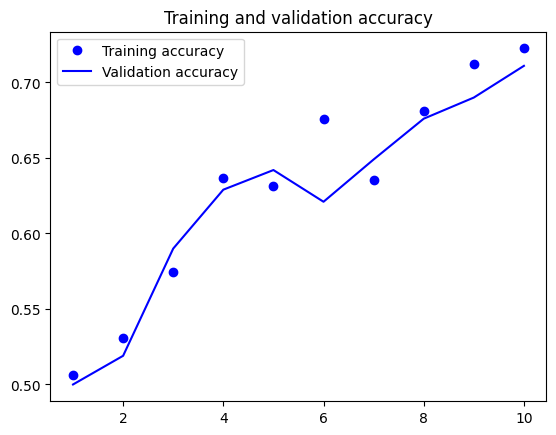

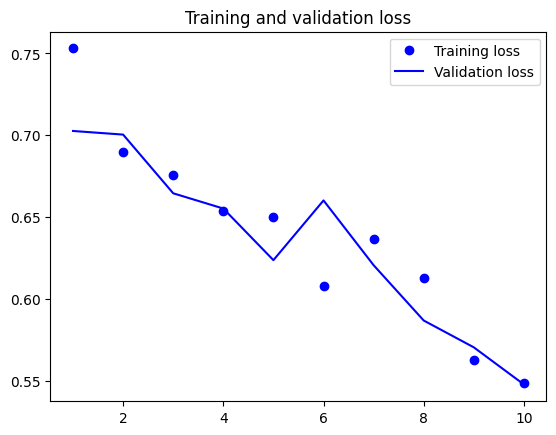

In [60]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [7]:
model.save("/content/cats_vs_dogs_model.keras")  # or .h5


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


In [8]:
from tensorflow.keras.models import load_model
model = load_model("/content/cats_vs_dogs_model.keras")  # or .h5 if previously saved


In [24]:
from google.colab import files

uploaded = files.upload()  # choose your image, e.g., my_dog.jpg


Saving my-cat.jpg to my-cat (2).jpg


In [42]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

# 1️⃣ Load your trained model
model = load_model("/content/cats_vs_dogs_model.keras")  # or .h5

# 2️⃣ Path to your new image
img_path = "/content/my-cat (2).jpg"  # make sure the file exists in this path

# 3️⃣ Load & preprocess
img = load_img(img_path, target_size=(180, 180))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

# 4️⃣ Predict
prediction = model.predict(img_array)

# 5️⃣ Interpret
if prediction[0][0] < 0.5:
    print("This is a CAT")
else:
    print("This is a DOG")

print("Model output (0=cat, 1=dog):", prediction[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
This is a DOG
Model output (0=cat, 1=dog): 0.50007564
